### 1. Neural networks

Text(0, 0.5, 'Feature 1')

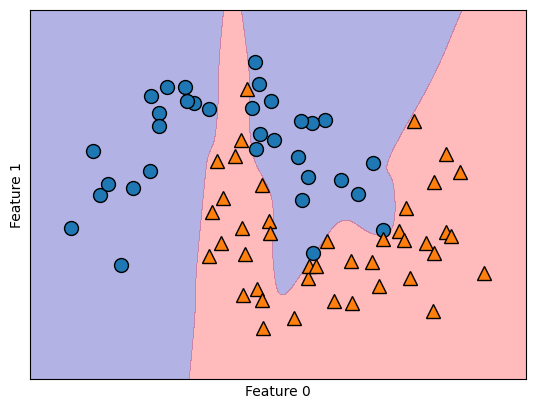

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt

X,y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=42,
                    hidden_layer_sizes=[10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 2. Linear SVM

Text(0, 0.5, 'Feature 1')

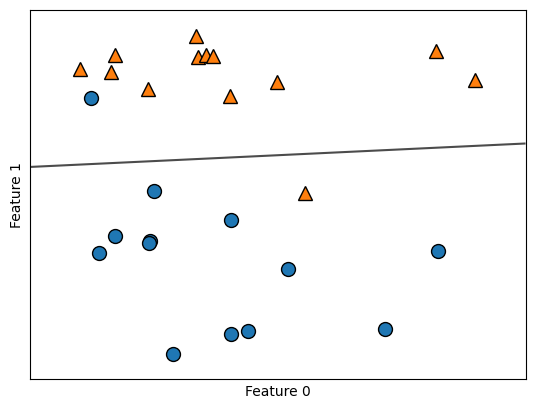

In [3]:
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, fill=False, eps=0.5, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

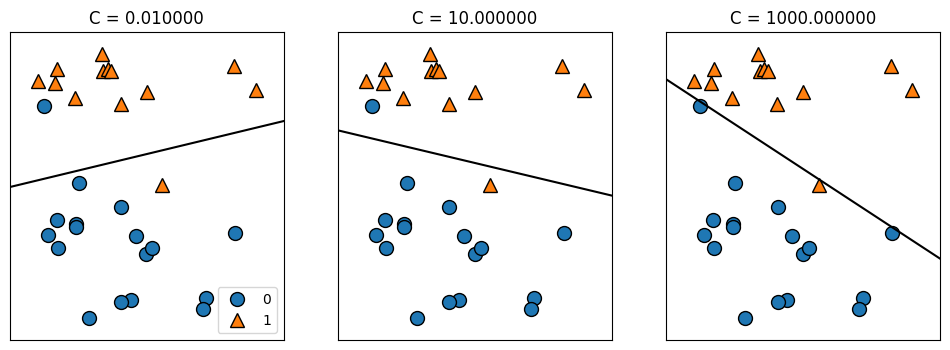

In [4]:
mglearn.plots.plot_linear_svc_regularization()

### 3. Kernel SVM

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set:", svc.score(X_train, y_train))
print("Accuracy on test set:", svc.score(X_test, y_test))

Accuracy on training set: 0.9107981220657277
Accuracy on test set: 0.951048951048951


In [9]:
print(cancer["DESCR"])
print(cancer["feature_names"])
print(cancer["data"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:", svc.score(X_train_scaled, y_train))
print("Accuracy on test set:", svc.score(X_test_scaled, y_test))

Accuracy on training set: 0.9835680751173709
Accuracy on test set: 0.9790209790209791


In [12]:
svc=SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:", svc.score(X_train_scaled, y_train))
print("Accuracy on test set:", svc.score(X_test_scaled, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.951048951048951


### 4. Multiclass classification

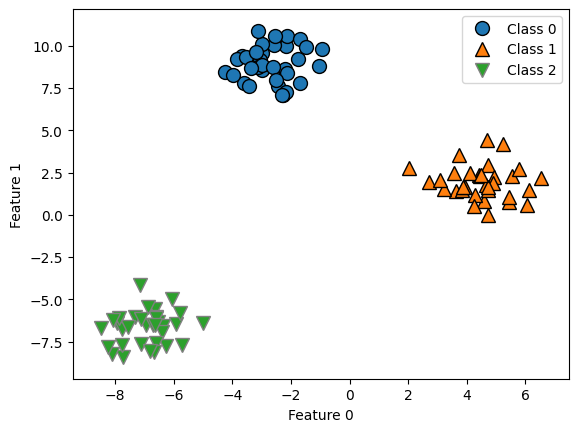

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [14]:
svm = LinearSVC().fit(X, y)
print("Coefficient shape:", svm.coef_.shape)
print("Intercept shape:", svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


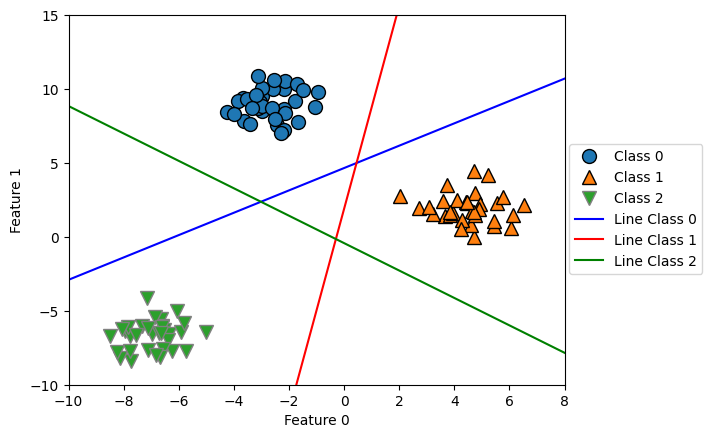

In [15]:
import numpy as np
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(svm.coef_, svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

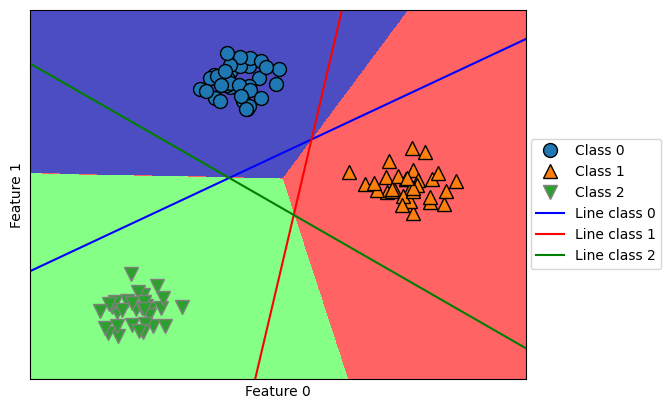

In [23]:
mglearn.plots.plot_2d_classification(svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(svm.coef_, svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0',
'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 5. Exercises

1. Because for Class 0, the values for feature 0 are negative while the values for feature 1 are positive. For class 1, the values of feature 1 are positive while the values for feature 0 are negative. For class 2, the values of both features are negative so the signs of the coefficients reflect those attributes.

In [18]:
print(svm.coef_)

[[-0.17492412  0.23140766]
 [ 0.47622012 -0.06936786]
 [-0.18914207 -0.20400079]]


2. Zip combines the arrays of coefficients, intercepts and colors into their separate classes. So for example, coefficients of class 0 are combined with intercepts of class 0 along with the color of class 0 (b). Class 1 coefficients would be combined with class 1 intercepts along with the color r. Although the term "class" is more referring to the index location of how the coefficient and intercept are separated.
3. While the first entry in the plot() function is are the X_values, the second parameter slot is for the calculations of the Y_values. the equation is for calculating the slope of the boundary lines for classfying the various classes.